In [21]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [22]:
#Import dataset

df = pd.read_csv('Data_cleaning.csv')

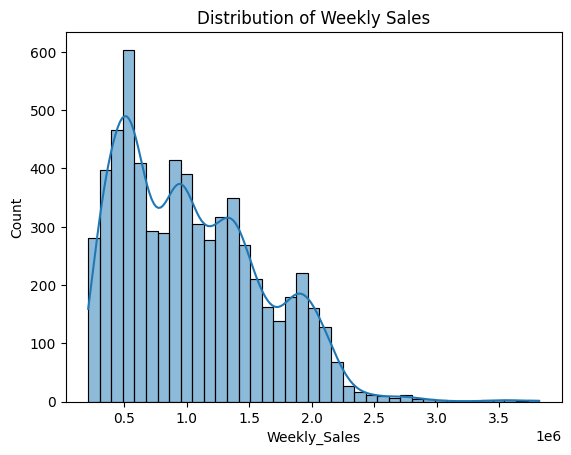

In [23]:
#Sales Distribution

plt.figure()
sns.histplot(df['Weekly_Sales'], kde=True) ##Kernal Density estimation
plt.title("Distribution of Weekly Sales")
plt.show()


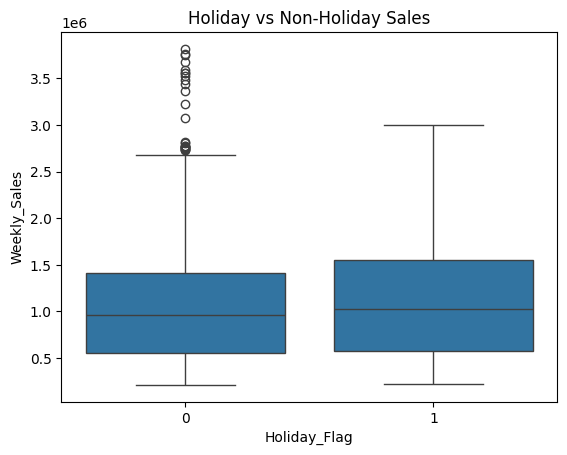

In [24]:
# Holiday vs Non-Holiday Sales
plt.figure()
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Holiday vs Non-Holiday Sales")
plt.show()

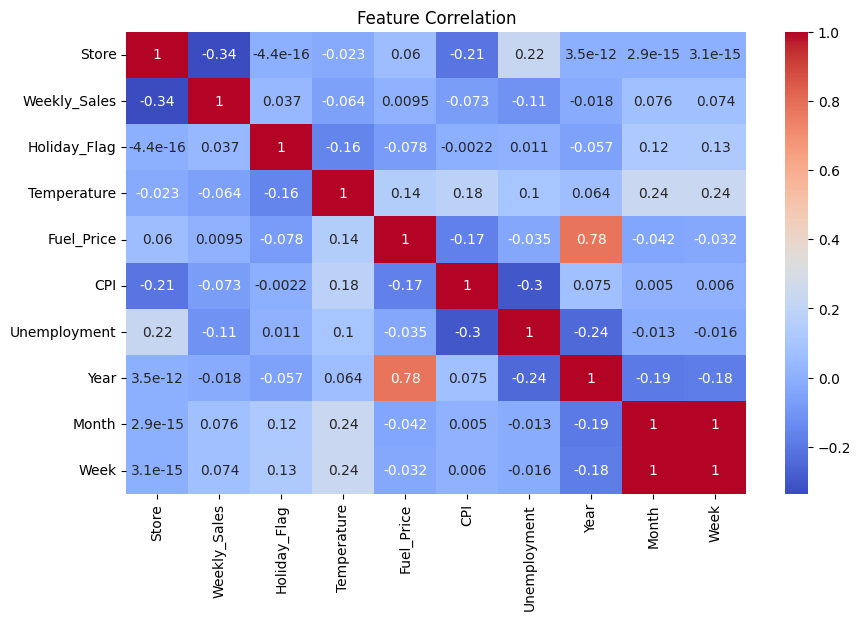

In [25]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=['number']) ##some dates were string hence changed to numeric

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

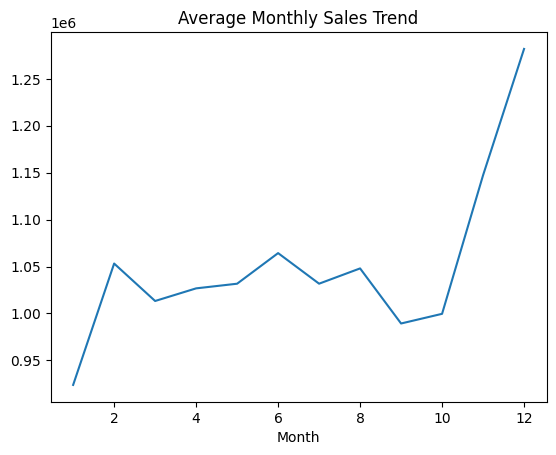

In [26]:
# Monthly sales trend
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

plt.figure()
monthly_sales.plot(kind='line')
plt.title("Average Monthly Sales Trend")
plt.show()

Modelling

In [27]:
##Defining Independent and depedent variables

X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']]
y = df['Weekly_Sales']

In [28]:
##Train-test split


X_train, X_test,y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42  
)

In [29]:
## Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression (Baseline)

In [30]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr)) 
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2:", r2_lr)


Linear Regression RMSE: 562631.7724810028
Linear Regression R2: 0.01738312550370069


Random Forest Regressoin

In [31]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)


Random Forest RMSE: 535098.7438936485
Random Forest R2: 0.11120096639916321


In [32]:
# Model comparison
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [rmse_lr, rmse_rf],
    "R2 Score": [r2_lr, r2_rf]
})

results


,Model,RMSE,R2 Score
0,Linear Regression,562631.772481,0.017383
1,Random Forest,535098.743894,0.111201
